# Task 6.1

In [1]:
# load from csv via pandas
import pandas as pd
import numpy as np


df = pd.read_csv('C:\Users\User\Documents\I2018 - Earth System Data - Rossi\data_samples\\xyz\points3d.csv')
# plot the xy point location
from matplotlib import pyplot as plt

df.plot(x='eastings', y='northings', marker='.')
plt.show()

<Figure size 640x480 with 1 Axes>

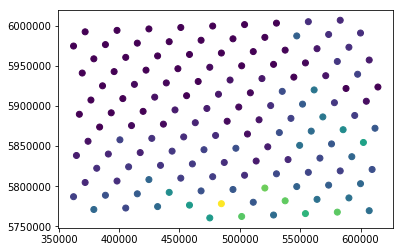

In [2]:
# this time we also condider "z"
x,y,z = [],[],[]

x.append (df.eastings)
y.append (df.northings)
z.append (df.topo)
fig = plt.figure()
#ax = fig.add_subplot(111)
#plt.plot(y,x,'.')
#ax.plot(y,x,'.')
plt.scatter(x,y,c=z)
plt.show()

# print(df.topo)

In [3]:
np.asarray(z)

array([[ 13,  15,   0,   0,   0,   0,   0,   0,   0,  15,  15,  34,   0,
          0,   0,   0,   0,   0,   0,  15,   7,   1,   0,   0,   0,   0,
          0,   0,   8,  18,   2,   0,   0,   3,   0,   0,   0,   0,  22,
          6,   0,   7,   6,   0,   2,   3,   0,   0,   0,  43,  26,   2,
          7,   0,   5,   0,   0,   4,  18,  32,  15,   3,   9,   8,   0,
          0,   0,  20,  44,  22,   6,   3,  11,   3,   3,   0,  30,  53,
         39,  27,   4,  14,  14,  16,  22,   5,  64,  30,  41,   9,  27,
         22,  18,  10,  12,   9,  36,  24,  13,   8,  15,  19,  17,  18,
         15,  27,  21,  23,  25,  15,  20,  20,  36,  15,  13,  37,  33,
         35,  86,  30,  28,  54,  32,  28,  21,  41,  41,  84,  30, 111,
         60,  38,  24,  37,  40,  83,  72,  39,  82,  60]], dtype=int64)

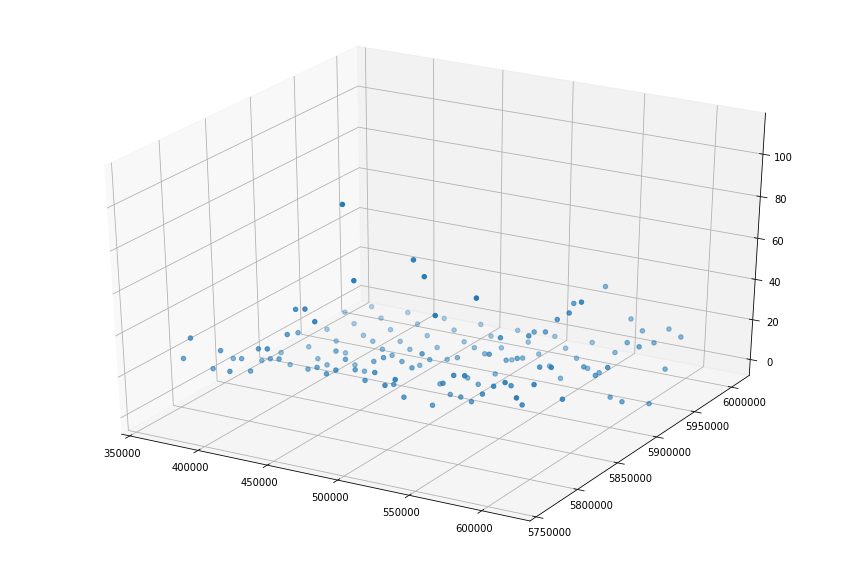

In [4]:
# Optional step - 3d visualization, requires older module six, to install with pip:
## pip install matplotlib --upgrade --ignore-installed six
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.scatter(np.asarray(x)[0],np.asarray(y)[0],np.asarray(z)[0])
#ax.plot_trisurf(np.asarray(x)[0],np.asarray(y)[0],np.asarray(z)[0], )
plt.show()

5
5


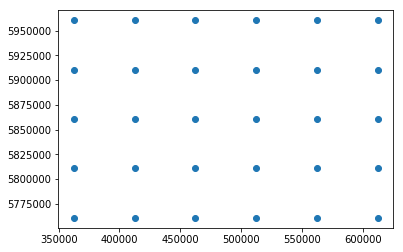

In [5]:
import numpy as np
from scipy.interpolate import griddata
from numpy import genfromtxt

my_data = genfromtxt('../data_samples/xyz/points3d.csv', delimiter=',')
x = my_data[1:, 0]
y = my_data[1:, 1]
z = my_data[1:, 2]

# target grid to interpolate to
xi = np.arange(df.eastings.min(),df.eastings.max(),50000)
yi = np.arange(df.northings.min(),df.northings.max(),50000)

xi,yi = np.meshgrid(xi,yi)

print(len(xi))
print(len(yi))

plt.scatter(xi, yi)
plt.show()

# interpolate
# zi = griddata((x,y),z,(xi,yi),method='linear')
zi = griddata((x,y),z,(xi,yi),method='nearest')

# see https://matplotlib.org/examples/pylab_examples/colorbar_tick_labelling_demo.html

In [6]:
points = df.topo
values = df.eastings, df.northings

10
10
10


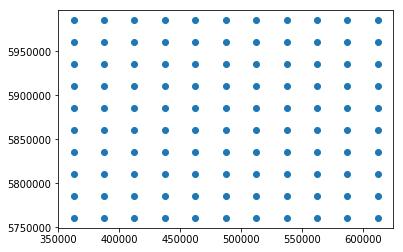

[[ 37.  37.  24.  38.  60.  60.  82.  39.  72.  83.  40.]
 [ 21.  28.  32.  54.  60. 111.  30.  84.  41.  41.  40.]
 [ 13.  15.  36.  36.  20.  20.  15.  25.  23.  21.  27.]
 [  9.  12.  10.  17.  19.  15.   8.  13.  24.  36.  27.]
 [  5.   0.  22.  16.  14.  14.   4.  27.  39.  53.  30.]
 [  0.   0.   3.   3.  11.   3.   6.  22.  44.  20.  30.]
 [  0.   0.   0.   5.   0.   7.   2.  26.  43.   0.   4.]
 [  0.   0.   3.   2.   0.   6.   7.   0.   6.  22.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.   2.  18.   8.]
 [  0.   0.   0.   0.   0.   0.   0.  34.  15.  15.  15.]]


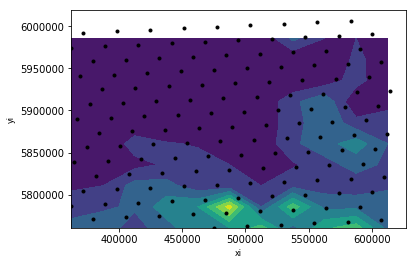

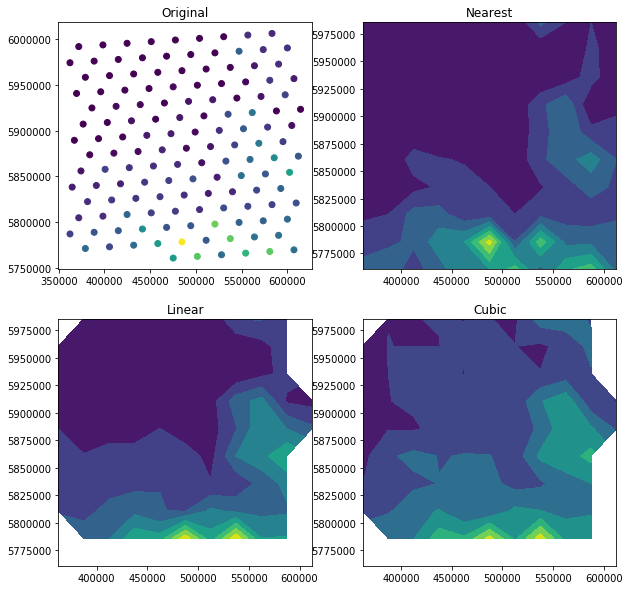

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# data coordinates and values

# target grid to interpolate to
xi = np.arange(df.eastings.min(),df.eastings.max(),25000)
yi = np.arange(df.northings.min(),df.northings.max(),25000)

xi,yi = np.meshgrid(xi,yi)
zi = griddata((x,y),z,(xi,yi),method='nearest')
print(len(xi))
print(len(yi))
print(len(zi))

plt.scatter(xi, yi)
plt.show()

# interpolate
# zi = griddata((x,y),z,(xi,yi),method='linear')
grid_z_nearest = griddata((x,y),z,(xi,yi),method='nearest')
grid_z_linear = griddata((x,y),z,(xi,yi),method='linear')
grid_z_cubic = griddata((x,y),z,(xi,yi),method='cubic')

print(zi)


# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,y,'k.')
plt.contourf(xi,yi,zi)

plt.xlabel('xi',fontsize=8)
plt.ylabel('yi',fontsize=8)


plt.show()

plt.subplot(221)
#plt.plot(x,y,'k.')
plt.scatter(x,y,c=z)
plt.title('Original')
plt.subplot(222)
plt.contourf(xi,yi,grid_z_nearest)
plt.title('Nearest')
plt.subplot(223)
plt.contourf(xi,yi,grid_z_linear)
plt.title('Linear')
plt.subplot(224)
plt.contourf(xi,yi,grid_z_cubic)
plt.title('Cubic')
plt.gcf().set_size_inches(10, 10)
plt.show()

# 6.1 (50km)

5
5
5


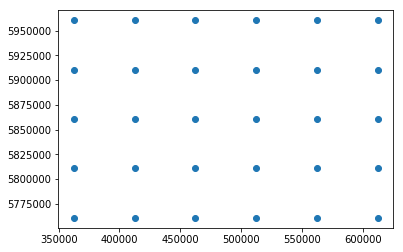

[[37. 24. 60. 82. 72. 40.]
 [13. 36. 20. 15. 23. 27.]
 [ 5. 22. 14.  4. 39. 30.]
 [ 0.  0.  0.  2. 43.  4.]
 [ 0.  0.  0.  0.  2.  8.]]


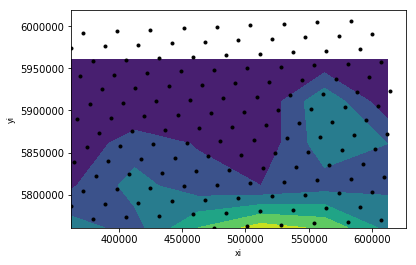

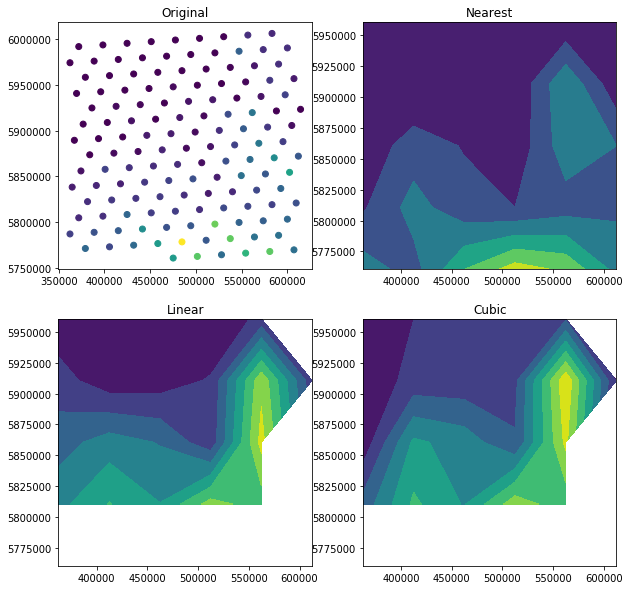

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# data coordinates and values

# target grid to interpolate to
xi = np.arange(df.eastings.min(),df.eastings.max(),50000)
yi = np.arange(df.northings.min(),df.northings.max(),50000)

xi,yi = np.meshgrid(xi,yi)
zi = griddata((x,y),z,(xi,yi),method='nearest')
print(len(xi))
print(len(yi))
print(len(zi))

plt.scatter(xi, yi)
plt.show()

# interpolate
# zi = griddata((x,y),z,(xi,yi),method='linear')
grid_z_nearest = griddata((x,y),z,(xi,yi),method='nearest')
grid_z_linear = griddata((x,y),z,(xi,yi),method='linear')
grid_z_cubic = griddata((x,y),z,(xi,yi),method='cubic')

print(zi)


# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,y,'k.')
plt.contourf(xi,yi,zi)

plt.xlabel('xi',fontsize=8)
plt.ylabel('yi',fontsize=8)


plt.show()

plt.subplot(221)
#plt.plot(x,y,'k.')
plt.scatter(x,y,c=z)
plt.title('Original')
plt.subplot(222)
plt.contourf(xi,yi,grid_z_nearest)
plt.title('Nearest')
plt.subplot(223)
plt.contourf(xi,yi,grid_z_linear)
plt.title('Linear')
plt.subplot(224)
plt.contourf(xi,yi,grid_z_cubic)
plt.title('Cubic')
plt.gcf().set_size_inches(10, 10)
plt.show()

# 6.1 (10km)

25
25
25


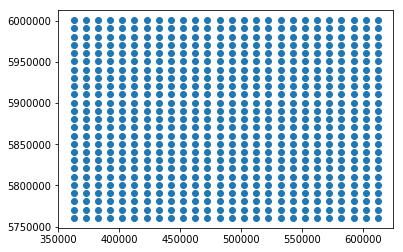

[[ 37.  37.  37.  37.  24.  24.  38.  38.  38.  60.  60.  60.  60.  82.
   82.  82.  39.  39.  72.  72.  72.  83.  83.  83.  40.  40.]
 [ 21.  37.  37.  37.  24.  24.  38.  38.  38.  60.  60.  60. 111. 111.
   82.  30.  39.  39.  84.  72.  72.  83.  83.  83.  40.  40.]
 [ 21.  37.  37.  28.  24.  24.  38.  38.  54.  60.  60. 111. 111. 111.
   30.  30.  30.  84.  84.  41.  41.  41.  41.  41.  40.  40.]
 [ 21.  21.  28.  28.  32.  32.  32.  54.  54.  54.  28.  28. 111.  30.
   30.  30.  86.  84.  84.  35.  41.  33.  41.  41.  37.  37.]
 [ 13.  13.  13.  15.  15.  32.  36.  36.  54.  20.  28.  28.  20.  30.
   30.  86.  86.  86.  35.  35.  33.  33.  33.  37.  37.  37.]
 [ 13.  13.  15.  15.  15.  36.  36.  36.  20.  20.  20.  20.  20.  15.
   15.  15.  25.  25.  35.  23.  23.  33.  21.  37.  37.  27.]
 [  9.  15.  15.  15.  18.  18.  36.  17.  17.  20.  19.  20.  20.  15.
   15.   8.  25.  25.  13.  23.  23.  21.  21.  21.  27.  27.]
 [  9.   9.  15.  12.  18.  18.  10.  17.  17.  19.  19

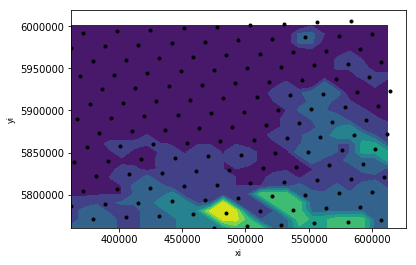

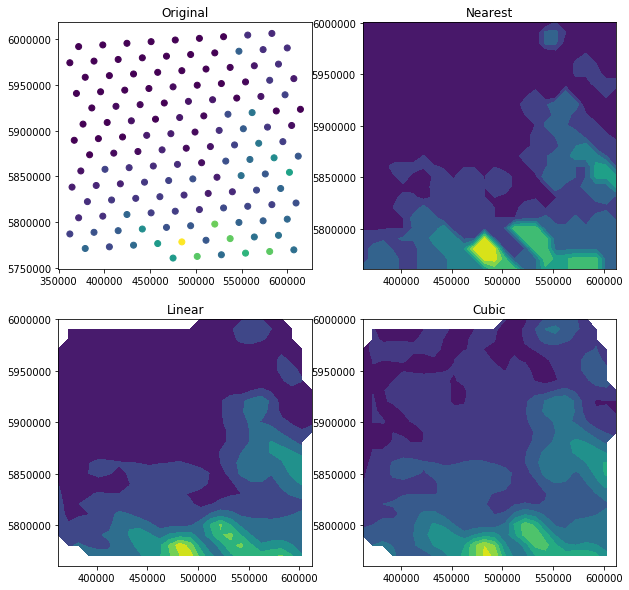

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# data coordinates and values

# target grid to interpolate to
xi = np.arange(df.eastings.min(),df.eastings.max(),10000)
yi = np.arange(df.northings.min(),df.northings.max(),10000)

xi,yi = np.meshgrid(xi,yi)
zi = griddata((x,y),z,(xi,yi),method='nearest')
print(len(xi))
print(len(yi))
print(len(zi))

plt.scatter(xi, yi)
plt.show()

# interpolate
# zi = griddata((x,y),z,(xi,yi),method='linear')
grid_z_nearest = griddata((x,y),z,(xi,yi),method='nearest')
grid_z_linear = griddata((x,y),z,(xi,yi),method='linear')
grid_z_cubic = griddata((x,y),z,(xi,yi),method='cubic')

print(zi)


# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,y,'k.')
plt.contourf(xi,yi,zi)

plt.xlabel('xi',fontsize=8)
plt.ylabel('yi',fontsize=8)


plt.show()

plt.subplot(221)
#plt.plot(x,y,'k.')
plt.scatter(x,y,c=z)
plt.title('Original')
plt.subplot(222)
plt.contourf(xi,yi,grid_z_nearest)
plt.title('Nearest')
plt.subplot(223)
plt.contourf(xi,yi,grid_z_linear)
plt.title('Linear')
plt.subplot(224)
plt.contourf(xi,yi,grid_z_cubic)
plt.title('Cubic')
plt.gcf().set_size_inches(10, 10)
plt.show()

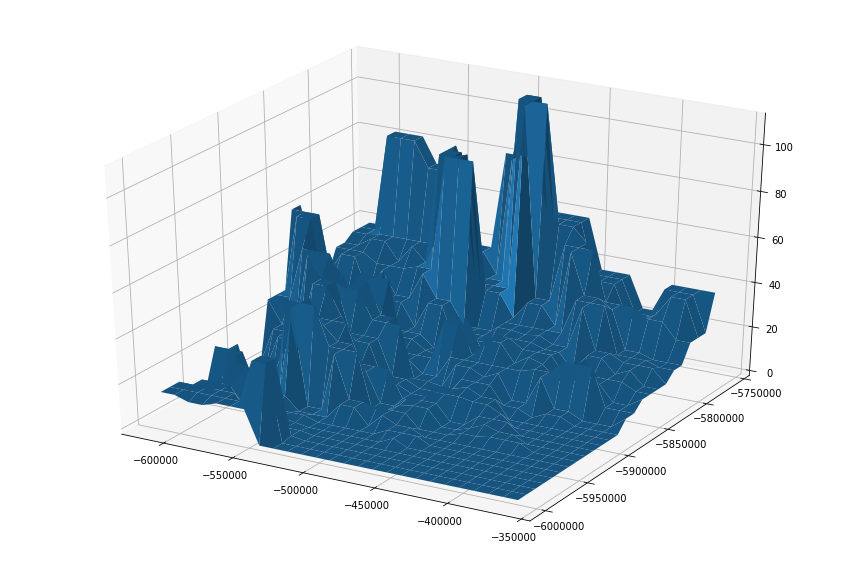

In [10]:
# Optional step - 3d visualization, requires older module 'six', to install with pip:
## pip install matplotlib --upgrade --ignore-installed six
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_surface(-xi,-yi,grid_z_nearest)
plt.show()

# Task 6.2

crs
lat
lon
Band1
[[-1.310e+02 -1.240e+02 -1.210e+02 ...  1.380e+02  1.380e+02  1.370e+02]
 [-1.370e+02 -1.260e+02 -1.230e+02 ...  1.330e+02  1.320e+02  1.390e+02]
 [-1.440e+02 -1.320e+02 -1.250e+02 ...  1.240e+02  1.280e+02  1.310e+02]
 ...
 [-1.084e+03 -1.093e+03 -1.106e+03 ... -3.000e+00 -4.000e+00 -7.000e+00]
 [-1.069e+03 -1.075e+03 -1.086e+03 ... -5.000e+00 -4.000e+00 -9.000e+00]
 [-1.060e+03 -1.063e+03 -1.070e+03 ... -4.000e+00 -2.000e+00 -1.000e+00]]


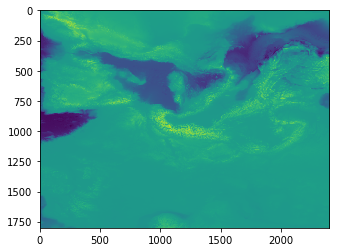

In [11]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4

# fname = 'http://thredds.ucar.edu/thredds/dodsC/grib/NCEP/GFS/Global_onedeg/Best'  # Remote OPeNDAP Dataset 
filename = '../data_samples/geospatial-raster/etopo1.nc'   # Local NetCDF file

# f = netCDF4.Dataset(filename)

f = xr.open_dataset(filename)
# # dsloc = ds.sel(lon=230.5,lat=55.0,method='nearest')

for v in f.variables: print(v)
print(f.Band1.data)
# flipped = np.flipud(f.Band1.data)# it's flipped!
#plotting
plt.imshow(f.Band1.data)
plt.show()

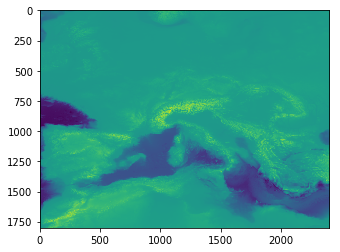

In [12]:
flipped = np.flipud(f.Band1.data)# it's flipped!
#plotting
plt.imshow(flipped)
plt.show()

In [13]:
f.Band1.lat

<xarray.DataArray 'lat' (lat: 1801)>
array([30.      , 30.016667, 30.033333, ..., 59.966667, 59.983333, 60.      ])
Coordinates:
  * lat      (lat) float64 30.0 30.02 30.03 30.05 ... 59.95 59.97 59.98 60.0
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north

In [14]:
print("minumum latitude is: ", min(f.Band1.lat.values))

print("maximum latitude is: ", max(f.Band1.lat.values))

print("minumum longitude is: ", min(f.Band1.lon.values))

print("maximum longitude is: ", max(f.Band1.lon.values))

minlon = min(f.Band1.lon.values)
maxlon = max(f.Band1.lon.values)
minlat = min(f.Band1.lat.values)
maxlat = max(f.Band1.lat.values)

('minumum latitude is: ', 30.0)
('maximum latitude is: ', 60.0)
('minumum longitude is: ', -10.0)
('maximum longitude is: ', 30.0)


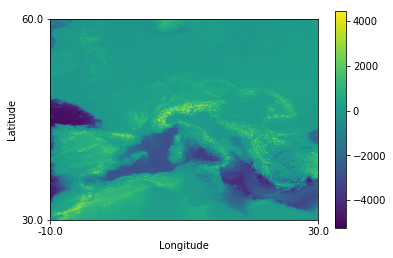

In [15]:
# plot with legend, x an y axis labels
fig, ax = plt.subplots()
#Ticks for y-axis (latitude)
ax.axes.yaxis.set_ticks([0,flipped.shape[0]])
ax.axes.yaxis.set_ticklabels([maxlat,minlat])
plt.ylabel('Latitude')
#Ticks for x-axis (latitude)
ax.axes.xaxis.set_ticks([0,flipped.shape[1]])
ax.axes.xaxis.set_ticklabels([minlon,maxlon])
plt.xlabel('Longitude')
plt.imshow(flipped)
plt.colorbar()

plt.show()

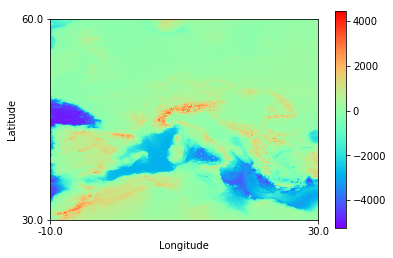

In [16]:
# plot with legend, x an y axis labels
fig, ax = plt.subplots()
plt.imshow(flipped, cmap='rainbow')
# plt.imshow(flipped, cmap='magma')
# plt.imshow(flipped, cmap='viridis') # the default one from above
plt.colorbar()
#Ticks for y-axis (latitude)
ax.axes.yaxis.set_ticks([0,flipped.shape[0]])
ax.axes.yaxis.set_ticklabels([maxlat,minlat])
plt.ylabel('Latitude')
#Ticks for x-axis (latitude)
ax.axes.xaxis.set_ticks([0,flipped.shape[1]])
ax.axes.xaxis.set_ticklabels([minlon,maxlon])
plt.xlabel('Longitude')
plt.show()

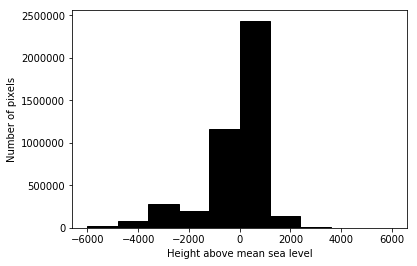

In [17]:
# histogramm of plot
plt.hist(flipped.ravel(), bins=10, range=(-6000, 6000), fc='k', ec='k')
plt.xlabel('Height above mean sea level')
plt.ylabel('Number of pixels')
plt.show()



# Task 6.2 Using 5 bins

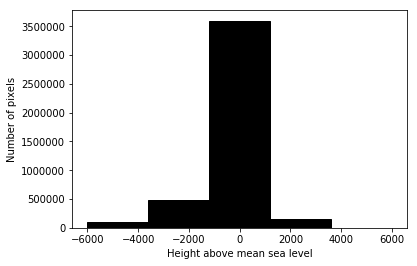

In [18]:
# histogramm of plot
plt.hist(flipped.ravel(), bins=5, range=(-6000, 6000), fc='k', ec='k')
plt.xlabel('Height above mean sea level')
plt.ylabel('Number of pixels')
plt.show()



# Task 6.2 Using 20 bins

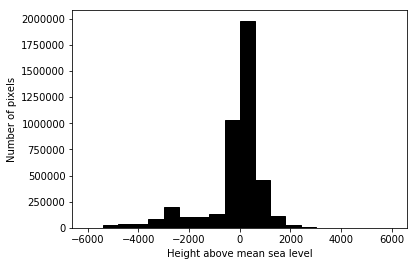

In [19]:
# histogramm of plot
plt.hist(flipped.ravel(), bins=20, range=(-6000, 6000), fc='k', ec='k')
plt.xlabel('Height above mean sea level')
plt.ylabel('Number of pixels')
plt.show()



# Task 6.3 Plot contours using different subset (300:600)

In [20]:
# load needed stuff...
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.cm as cm

[[-1.310e+02 -1.240e+02 -1.210e+02 ...  1.380e+02  1.380e+02  1.370e+02]
 [-1.370e+02 -1.260e+02 -1.230e+02 ...  1.330e+02  1.320e+02  1.390e+02]
 [-1.440e+02 -1.320e+02 -1.250e+02 ...  1.240e+02  1.280e+02  1.310e+02]
 ...
 [-1.084e+03 -1.093e+03 -1.106e+03 ... -3.000e+00 -4.000e+00 -7.000e+00]
 [-1.069e+03 -1.075e+03 -1.086e+03 ... -5.000e+00 -4.000e+00 -9.000e+00]
 [-1.060e+03 -1.063e+03 -1.070e+03 ... -4.000e+00 -2.000e+00 -1.000e+00]]


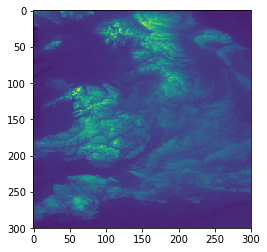

In [21]:
# %matplotlib inline

# # load raster with Pillow (gdal might have issues with all those dependencies and libraries installed..)
# from PIL import Image
filename = '../data_samples/geospatial-raster/etopo1.nc'
f = xr.open_dataset(filename)
#for v in f.variables: print(v)
print(f.Band1.data)
flipped = np.flipud(f.Band1.data)# it's flipped!
#subset
topoSubset=flipped[300:600,300:600]
plt.imshow(flipped[300:600,300:600])
plt.show()


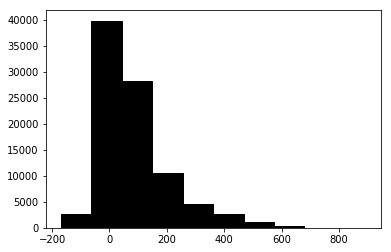

In [22]:
plt.hist(topoSubset.ravel(), bins=10, fc='k', ec='k')
plt.show()

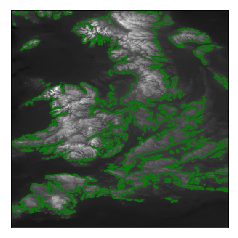

In [23]:
#http://scikit-image.org/docs/dev/auto_examples/edges/plot_contours.html
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
#find all contours at 100
contours = measure.find_contours(topoSubset, 100)
#plot them all in green
fig, ax = plt.subplots()
ax.imshow(topoSubset, interpolation='nearest', cmap=plt.cm.gray)
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color='green')

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

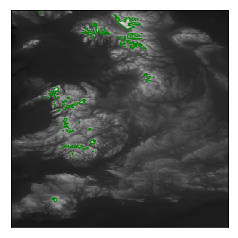

In [24]:
#http://scikit-image.org/docs/dev/auto_examples/edges/plot_contours.html
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
#find all contours at 500
contours = measure.find_contours(topoSubset, 500)
#plot them all in green
fig, ax = plt.subplots()
ax.imshow(topoSubset, interpolation='nearest', cmap=plt.cm.gray)
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color='green')

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

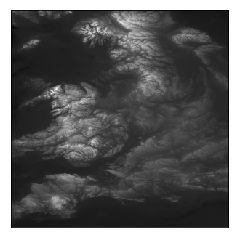

In [25]:
#http://scikit-image.org/docs/dev/auto_examples/edges/plot_contours.html
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
#find all contours at 1000
contours = measure.find_contours(topoSubset, 1000)
#plot them all in green
fig, ax = plt.subplots()
ax.imshow(topoSubset, interpolation='nearest', cmap=plt.cm.gray)
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color='green')

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

# Task 6.4 

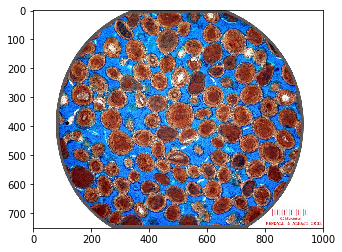

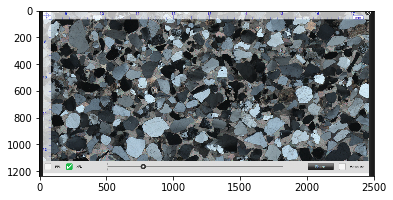

In [26]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
url= "http://www.sepmstrata.org/Images/_Gallery_Micro/Photos_Related/o-07-5x-01.jpg"
from io import BytesIO
response = requests.get(url)
img = np.asarray(Image.open(BytesIO(response.content)))
plt.imshow(img) 
plt.show()

myImage = np.asarray(Image.open("C:\Users\User\Documents\I2018 - Earth System Data - Rossi\data_samples\image-raster\sandstone_2.png"))
plt.imshow(myImage)
plt.show();

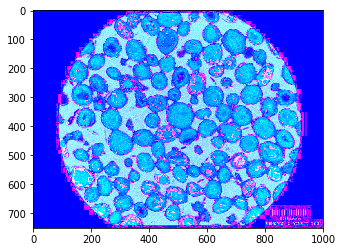

ValueError: Last dimension of input array must be 3; shape (1236L, 2506L, 4L) was found.

In [27]:
#convert from rgb to hsv
imgHSV=mpl.colors.rgb_to_hsv(img)
plt.imshow(imgHSV)
plt.show()

HSV=mpl.colors.rgb_to_hsv(myImage)
plt.imshow(HSV)
plt.show()

Could not find solution to this problem.... DOnt know why the image wont work

# Task 6.5

In [28]:
%matplotlib inline

import ternary

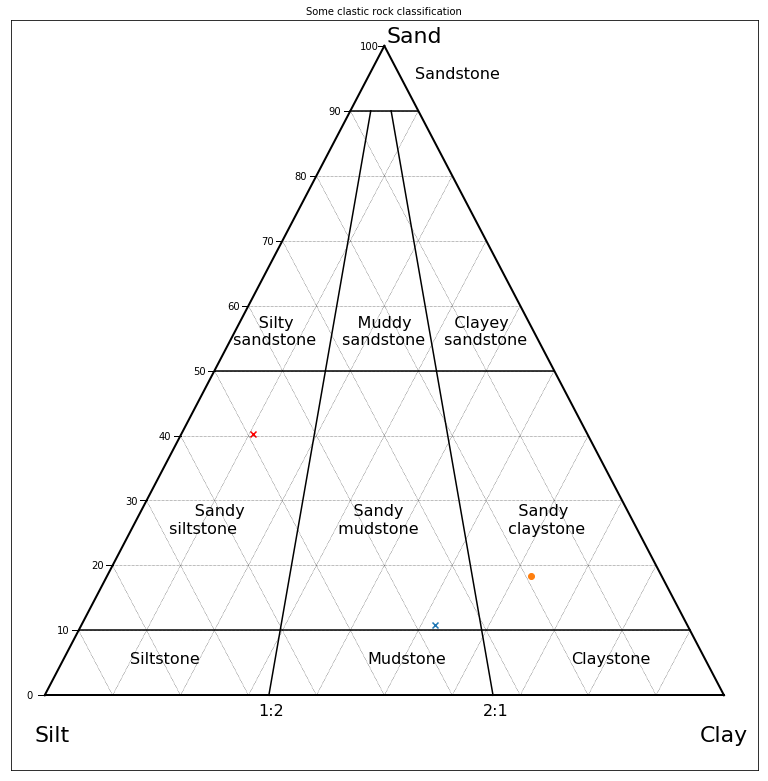

In [37]:
# Boundary and Gridlines
figure, tax = ternary.figure(scale=100)

figure.set_figheight(11)
figure.set_figwidth(11)

figure.tight_layout(h_pad=200,w_pad=20)

fontsize=10
# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
tax.gridlines(color="black", multiple=10, linewidth=0.5)

# Set Axis labels and Title
tax.set_title("Some clastic rock classification", fontsize=fontsize)

#Label principal components
tax.annotate("Sand",position=(0,100.5,120),fontsize=22)
tax.annotate("Silt",position=(2,-7,110),fontsize=22)
tax.annotate("Clay",position=(100,-7,110),fontsize=22)

# Set ticks
tax.ticks(axis='l', linewidth=1, multiple=10,clockwise=True)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()

# Draw horizontal lines
tax.horizontal_line(90, color='black')
tax.horizontal_line(50, color='black')
tax.horizontal_line(10, color='black')

# Draw vertical lines
tax.line((10/3,90,20/3), (100/3,0,200/3), color='black')
tax.annotate("1:2", position=((100/3,-3,200/3)), fontsize=16)
tax.line((20/3,90,10/3), (200/3,0,100/3), color='black')
tax.annotate("2:1", position=((200/3,-3,100/3)), fontsize=16)

# Annotate regions
tax.annotate("Sandstone",position=(7,95,5),fontsize=16)
tax.annotate("      Silty\n sandstone",position=(0,54,),fontsize=16)
tax.annotate("    Muddy\n sandstone",position=(16,54,),fontsize=16)
tax.annotate("   Clayey\n sandstone",position=(31,54,),fontsize=16)

tax.annotate("      Sandy\n siltstone",position=(5,25,),fontsize=16)
tax.annotate("    Sandy\n mudstone",position=(30,25,),fontsize=16)
tax.annotate("   Sandy\n claystone",position=(55,25,),fontsize=16)

tax.annotate("Siltstone",position=(10,5,),fontsize=16)
tax.annotate("Mudstone",position=(45,5,),fontsize=16)
tax.annotate("Claystone",position=(75,5,),fontsize=16)

#plot the compositon
composition1 = [[52.06362651, 10.83615119, 37.1002223]]
comp2=[[62.36913306, 18.31673522, 19.31413172]]
comp3=[[10.5, 40.3, 49.1]]

tax.scatter(composition1,marker="x")
tax.scatter(comp2,marker="o")
tax.scatter(comp3,marker="x",color="red")
#rock names represented are sandy siltstone, sandy mudstone and sandy claystone

ternary.plt.show()

In [32]:
# generate some random composition

n=3 # number of points

clay = np.random.uniform(0, 80,size=n) # generate random 1st variable
sand = np.random.uniform(0, 20,size=n)
silt = 100 - clay - sand

# print(clay)
# print (sand)
# print(silt)

print(clay+sand+silt)

composition = [
[52.06362651, 10.83615119, 37.1002223],
[62.36913306, 18.31673522, 19.31413172],
[10.5, 40.3, 49.1],
]

for k in range(0,n):
    print(clay[k])
    print(silt[k])
    print(sand[k])
    composition.append ((clay[k], sand[k], silt[k]))
print(composition[0]) 



[100. 100. 100.]
4.636014264417598
93.34068753819268
2.02329819738972
0.7600322611692167
88.12071864490987
11.119249093920915
21.509083241976885
73.44596865515567
5.044948102867455
[52.06362651, 10.83615119, 37.1002223]


# Task 6.6

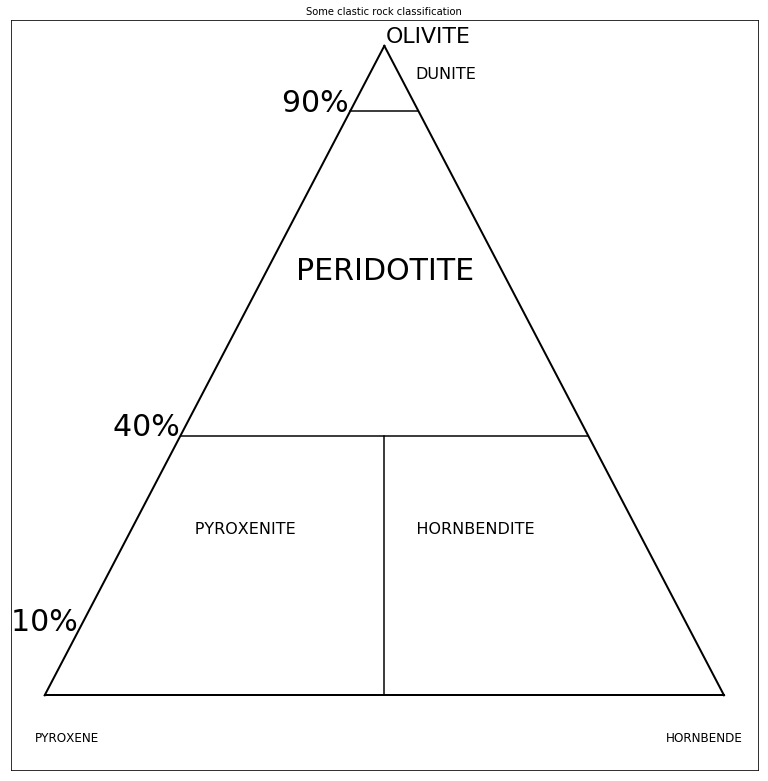

In [91]:
# Boundary and Gridlines
figure, tax = ternary.figure(scale=100)


figure.set_figheight(11)
figure.set_figwidth(11)

figure.tight_layout(h_pad=200,w_pad=20)

fontsize=10
# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
#tax.gridlines(color="black", multiple=10, linewidth=0.5)

# Set Axis labels and Title
tax.set_title("Some clastic rock classification", fontsize=fontsize)

#Label principal components
tax.annotate("OLIVITE",position=(0,100.5,120),fontsize=22)
tax.annotate("PYROXENE",position=(2,-7,110),fontsize=12)
tax.annotate("HORNBENDE",position=(95,-7,110),fontsize=12)

# Set ticks
ticks = [100,90,40,10]
#tax.ticks(axis='l', linewidth=1, multiple=10,clockwise=True)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()

# Draw horizontal lines
tax.horizontal_line(90, color='black')
tax.annotate("90%      ",(-10,90,),fontsize = 30)
tax.horizontal_line(40, color='black')
tax.annotate("40%      ",(-10,40,),fontsize = 30)
tax.annotate("10%      ",(-10,10,),fontsize = 30)
#tax.horizontal_line(10, color='black')

# Draw vertical lines
tax.line((30,40,40), (50,0,50), color='black')


# Annotate regions
tax.annotate("DUNITE",position=(7,95,5),fontsize=16)

tax.annotate("PERIDOTITE",position=(5,64,20),fontsize=30)


tax.annotate("      PYROXENITE",position=(5,25,),fontsize=16)
tax.annotate("   HORNBENDITE",position=(40,25,),fontsize=16)



# add scatter plot
### MISSING BITS - PLEASE FILL IN CHECK EXAMPLES

ternary.plt.show()

# Task 6.7

In [98]:
import numpy as np
import mplstereonet
import matplotlib.pyplot as plt

%matplotlib inline

In [99]:
strikes = [78, 80, 120, 91, 10, 343, 110, 43, 36, 12 , 45, 78, 30, 32, 33, 35, 45, 43, 67, 85, 43, 98, 50, 162]


dips = np.concatenate([np.random.randint(0, 90, 60),
                       np.random.randint(60, 90, 60),
                         ])

In [104]:
bin_edges = np.arange(-5, 366, 10)
number_of_strikes, bin_edges = np.histogram(strikes, bin_edges)

In [105]:
number_of_strikes[0] += number_of_strikes[-1]

In [106]:
half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
two_halves = np.concatenate([half, half])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 24 but corresponding boolean dimension is 120

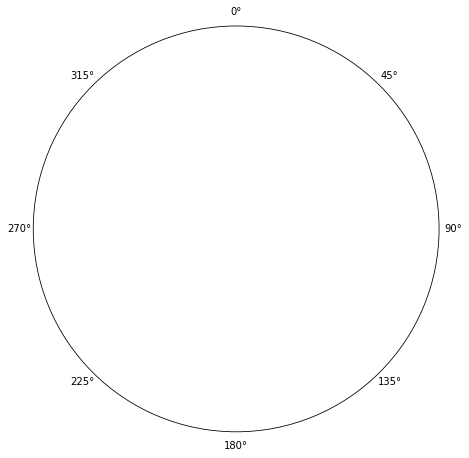

In [107]:
fig = plt.figure(figsize=(16,8))

# stereonet
ax = fig.add_subplot(121, projection='stereonet')

ax.pole(strikes, dips, c='k', label='Pole of the Planes')
ax.density_contourf(strikes, dips, measurement='poles', cmap='Reds')
ax.set_title('Density coutour of the Poles', y=1.10, fontsize=15)
ax.grid()

# rose diagram
ax = fig.add_subplot(122, projection='polar')

ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves, 
       width=np.deg2rad(10), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
ax.set_rgrids(np.arange(1, two_halves.max() + 1, 2), angle=0, weight= 'black')
ax.set_title('Rose Diagram of the "Fault System"', y=1.10, fontsize=15)
plt.show()
#fig.tight_layout()